In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #note matplotlib is imported differently than pandas and seaborn, functionally is not on the top level module like the other 2 libraries.


# 1. A **solid foundation** with Matplotlib and Seaborn:

Matplotlib Key points:

* Figure object is outermost part of the chart, it is actually the whole chart. We can control, for example, chart size.

* Axes object contains: ticks, minor ticks, labels, title, etc. It what you would think as the actual plot.

* Axes is not the same as the axis of a chart. Axis is an element of the axes object.

* **These concepts will also be useful in seaborn**

More about: https://matplotlib.org/3.5.0/gallery/showcase/anatomy.html

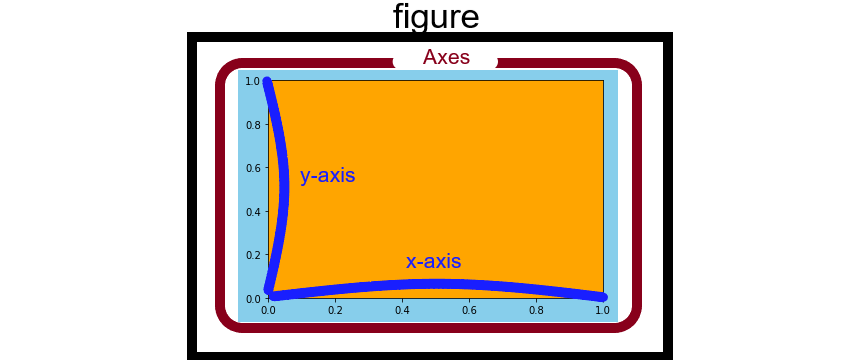

State based approach you don't instantiate objects in variables (Matlab inspired approach):

Type with me:

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

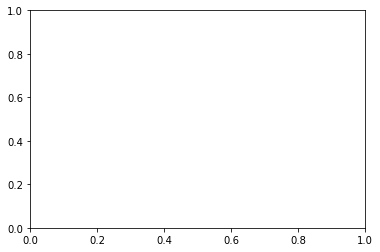

In [2]:
plt.subplots()

Object oriented approach (The one used in this Guided Project):

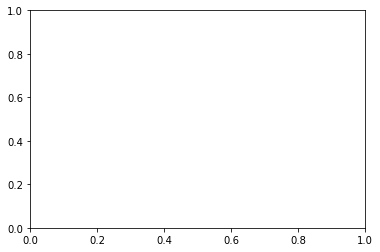

In [3]:
#Tuple returns two objects and objects instantiated as fig and ax variables:
fig, ax  = plt.subplots()

In [4]:
print(fig) #figure object instantiated in the fig variable
print(ax) #axes object instantiated in the ax variable

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


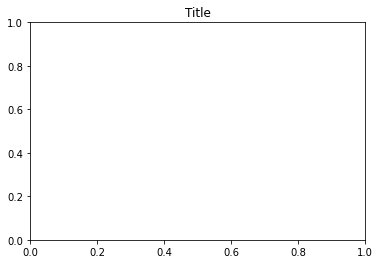

In [5]:
#Accessing methods inside instantiated axes object:
ax.set_title("Title")
fig

In this stackoverflow post, you can see that some answers use the state based approach and others used the object oriented approach: https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

Seaborn Key points :

* Seaborn is the 2nd most used Python data visualization library and **underlying it uses matplotlib methods and attributes**;

* The standard coding style used is the object-oriented approach. We use similar methods, like in matplotlib.

* Axes functions like matplotlib: **AxesSubplot** objects. **Examples of AxesSubplot methods: histplot(), kdeplot(), violinplot(), scatterplot(), swarmplot(), boxplot().**

* **Grid objects**: [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid), [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) and [JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid) objects. Grid are a wraper's for matplotlib figure object. The most important to us is FacetGrid  to make small multiples charts (a chart with two or more plots/axes).PairGrid may be used to plot a grid of scatterplots and JointGrid is used to enhance a single chart. **Examples of FacetGrid are: relplot, displot and catplot.**

Create and inspect seaborn objects:

seaborn.axisgrid.FacetGrid

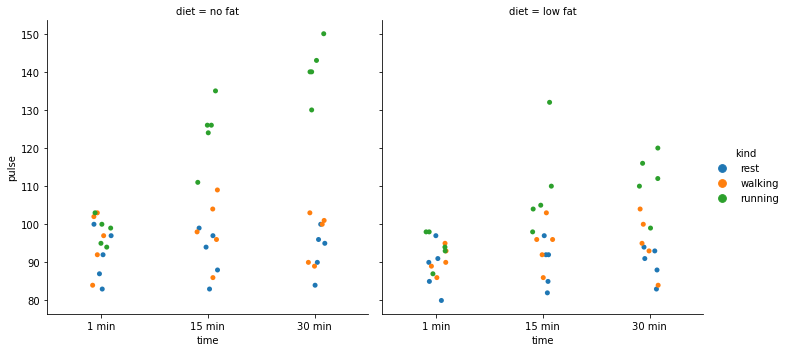

In [6]:
#Example of a FacetGrid object (this is a small multiples chart):
data_for_grid_obj = sns.load_dataset("exercise")
g = sns.catplot(data=data_for_grid_obj, y='pulse', x='time', hue='kind', col='diet'  ) 
#check the type of the object:
type(g)

matplotlib.axes._subplots.AxesSubplot

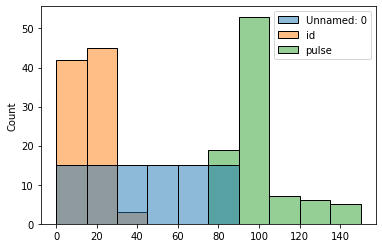

In [7]:
#Example of an AxesSubplot object (Notice seaborn doesn't return to us a fig object, just the axes object):
ax = sns.histplot(data=data_for_grid_obj)
type(ax)

Now that we got an overview of the anatomy of seaborn and matplotlib, in the next lesson we are going to learn how to access seaborn methods to investigate the distribution of data about Penguins from Palmers Station in Antarctica.

Github page of the Guided Project: https://github.com/jboverio/Coursera_EDA/

# Plotting and Analyzing Distributions

Dataset key points:
* Culmen in layman's terms is similar the bill of the bird (it is actually the ridge on top of the bill)

* Data is about Penguins

* There are 3 species of penguins: Gentoo, Chinstrap and Adelie

In [8]:
Penguin = pd.read_csv('https://raw.githubusercontent.com/jboverio/Coursera_EDA/main/penguins_lter.csv')
#Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.

In [9]:
Penguin.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [10]:
Penguin.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [11]:
del Penguin["Comments"]

In [12]:
Penguin = Penguin.dropna()


# Histograms

Histogram key points:

* Use for continuous or discrete data, not recommended for categorical data (bar charts)
* Show the shape of the distribution
* Use to communicate the distribution of data quickly
* Doesn't have space between the bars like a bar chart
* **sns.histplot() is to create histograms (it returns an axes matplotlib object)**

Seaborn pattern for plotting, four arguments: x, y, data and hue

Text(0, 0.5, 'Frequency')

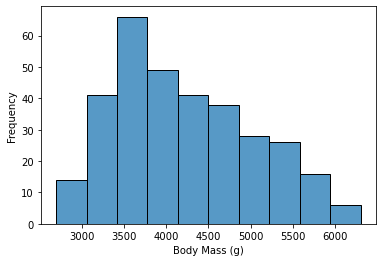

In [13]:
ax = sns.histplot(data=Penguin, x="Body Mass (g)")
ax.set_ylabel("Frequency")

# Critical thinking about Histograms and plots in general

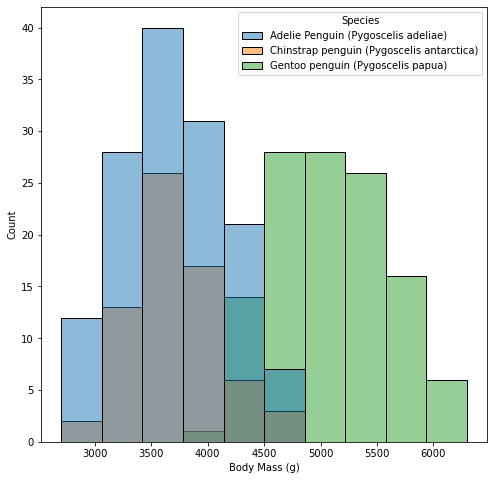

In [14]:
ax = sns.histplot(data=Penguin, x="Body Mass (g)", hue="Species")
ax.figure.set_size_inches((8, 8))

# Box-plots a versatile chart

Box-plots show something a histogram (out of the box) doesn't show: quartiles, median and outliers, but you lose the visualization of the shape of the data as you can see in the histogram.

Always remember, are you visualizing aggregated results?

Seaborn calculates outliers by what is smaller than Q1 - 1.5*IQR (Interquartile range) or bigger than Q3 + 1.5 * IQR

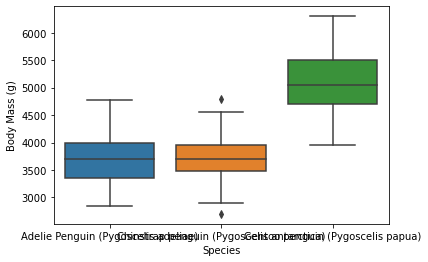

In [15]:
ax = sns.boxplot(data=Penguin, y="Body Mass (g)",  x = "Species")

## Violin plots

Combining kernel density / histograms + box-plots

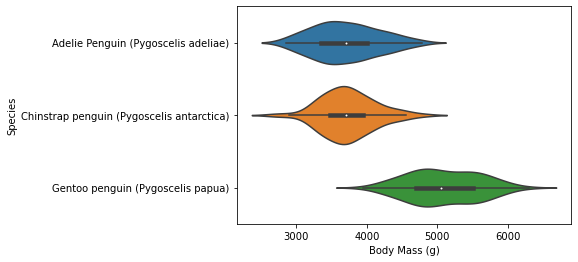

In [16]:
ax = sns.violinplot(data=Penguin, x = "Body Mass (g)", y = "Species")

https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

# Distribution of Categorical Data

Doesn't make much sense talk about the distribution of a categorical variable. What's the mean of the variable 'Species'? Bar plot is classicaly know for comparisons but could be used to visualize the "distribution" of categorical data, but more precisely compare groups.

# **Creating and analyzing Comparisons**

# Briefly talking about color and human perceptions: **Preattentive attributes.**

Preattentive processing occurs without our consciousness at an extremely high, determining what information catches our attention. This is important in visualization because it enables us to direct our viewer’s attention towards the most important information in our visual.

Univariate bar plot (1 categorical variable):

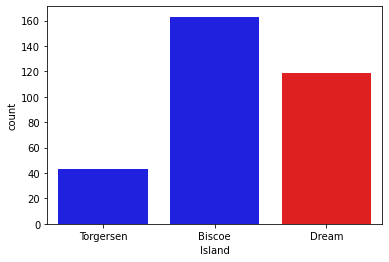

In [17]:
ax = sns.countplot(data=Penguin, x="Island", palette=['b', 'b', 'r'])

Bivariate bar plot with 2 categorical variables:

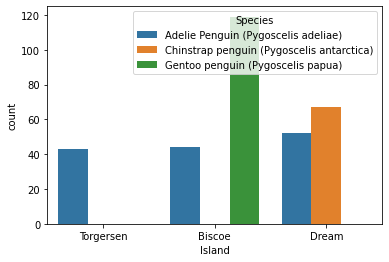

In [18]:
ax = sns.countplot(data=Penguin, x="Island", hue="Species")

Bivariate bar plot (Categorical and Numerical Variable):

In [19]:
mock_df = pd.DataFrame({'country': ['Brazil', 'USA', 'India', 'China'], 'population': [210, 330, 1400, 1500]})
mock_df

,country,population
0,Brazil,210
1,USA,330
2,India,1400
3,China,1500


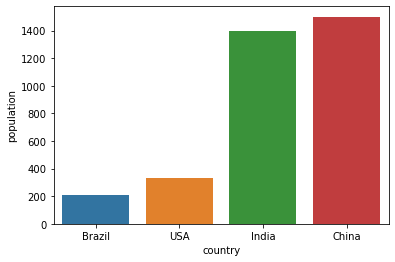

In [20]:
ax = sns.barplot(data=mock_df, x='country', y='population')

In [21]:
Penguin[['Species', 'Body Mass (g)']].head(8)

,Species,Body Mass (g)
1,Adelie Penguin (Pygoscelis adeliae),3800.0
2,Adelie Penguin (Pygoscelis adeliae),3250.0
4,Adelie Penguin (Pygoscelis adeliae),3450.0
5,Adelie Penguin (Pygoscelis adeliae),3650.0
6,Adelie Penguin (Pygoscelis adeliae),3625.0
7,Adelie Penguin (Pygoscelis adeliae),4675.0
14,Adelie Penguin (Pygoscelis adeliae),4400.0
16,Adelie Penguin (Pygoscelis adeliae),3450.0


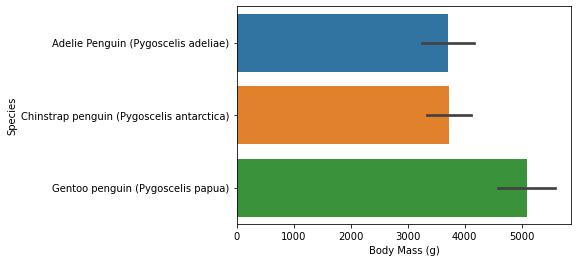

In [22]:
ax = sns.barplot(data=Penguin, y="Species", x="Body Mass (g)", ci='sd')


#Plotting and analyzing the composition of data or part-to-whole:

#A careful look at pie charts:

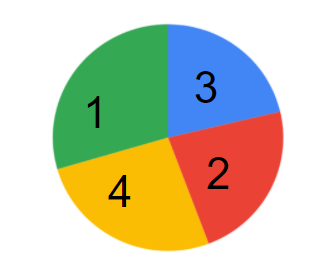

Pie chart principles (when plotting and when visualizing from other):
* Try to use pie chart with at max 3 slices (3 groups)
* Always make sure percentages sum to 100% (not more not less)
* Remember to add legends, title, etc

Creating a pie chart on seaborn (no result):
https://seaborn.pydata.org/search.html?q=pie&check_keywords=yes&area=default


In [23]:
Penguin['Species'].value_counts(normalize=True) #value_counts is used to counts the occurrences and normalize to make it percentages (sum to 100%)

Adelie Penguin (Pygoscelis adeliae)          0.427692
Gentoo penguin (Pygoscelis papua)            0.366154
Chinstrap penguin (Pygoscelis antarctica)    0.206154
Name: Species, dtype: float64

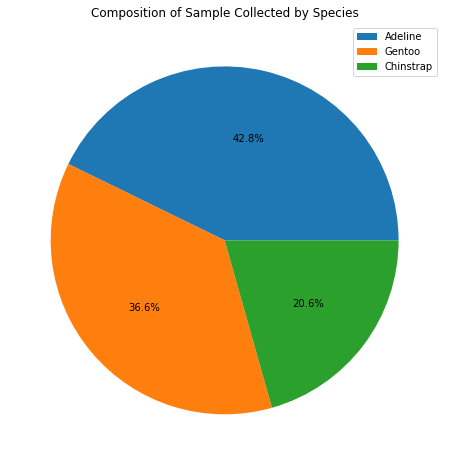

In [24]:
fig, ax = plt.subplots()
ax.pie(Penguin['Species'].value_counts(), autopct='%.1f%%');
ax.legend(['Adeline', 'Gentoo', 'Chinstrap'])
ax.set_title("Composition of Sample Collected by Species")
fig.set_size_inches(8, 8)

Creating a pie chart with Pandas

<AxesSubplot:ylabel='Species'>

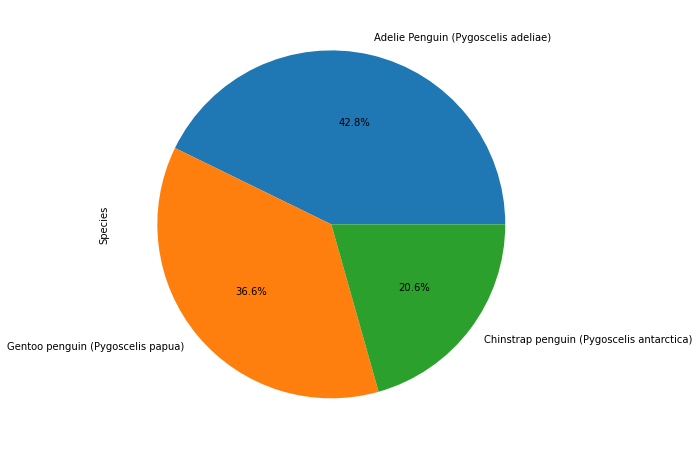

In [25]:
Penguin['Species'].value_counts().plot(kind='pie', autopct='%.1f%%', figsize=(8,8))

# Relationships

Scatter plots

Ok, so now, suppose we want to check if variables have some kind of relationship going on, for example, suppose you want to check if a variable increases the other increases too or decreases, that they have some kind of correlation. How could you check this visually?

Meet the scatter plot: Scatter plots plot the relationship between two variables as individual points, without connecting to each other. It helps visualize how these points spread across the x and y axes to find whether there are any patterns or clusters within the data. 

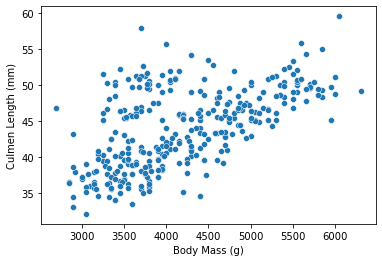

In [26]:
ax = sns.scatterplot(data=Penguin, x="Body Mass (g)", y="Culmen Length (mm)")

So it seems there is a relationship between culmen length and body mass, as the heavier the penguin, the bigger will be their beak.

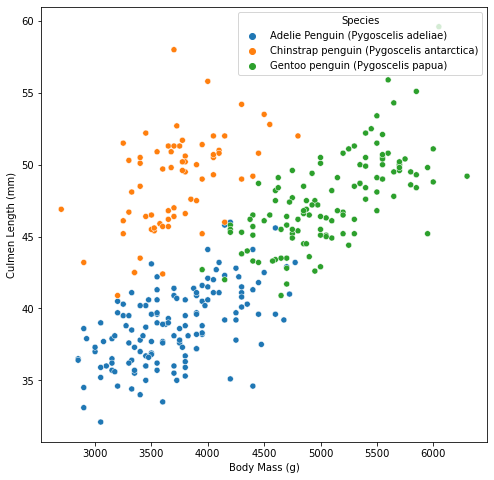

In [27]:
ax = sns.scatterplot(data=Penguin, x="Body Mass (g)", y="Culmen Length (mm)", hue="Species")
ax.figure.set_size_inches(8,8)

This is the same as to think at the previous figure as being an aggregate of the data, because there we were looking at all penguins, maybe some Species doesn't follow that relationship of bigger body mass leading to a bigger beak, right? Well just looking at the chart, it seems to me that the blue dots and the green dots show a stronger relationship as the orange dots (Chinstrap species) seem to be more dispersed with some heavy guys who have shorter beaks.

Categorical Variables Scatter plots

The problem of plotting with categorical data relationships: now suppose I wanted to see the relationship between gender and bodyweight. You can see that all the points fall above each other.

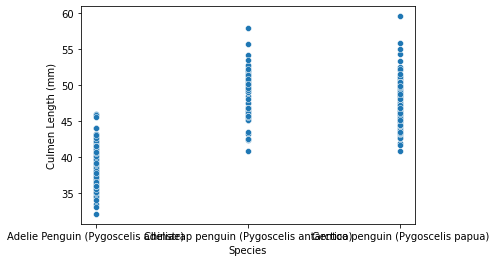

In [28]:
ax = sns.scatterplot(data=Penguin, x="Species", y="Culmen Length (mm)")

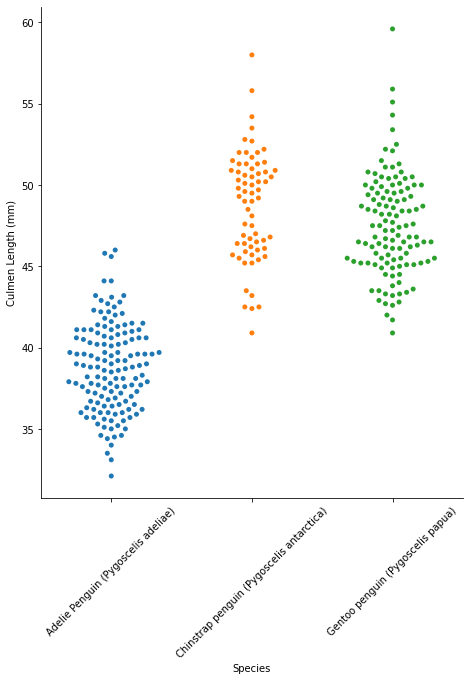

In [29]:
grid = sns.catplot(data=Penguin, x="Species", y="Culmen Length (mm)", kind='swarm')
grid.figure.set_size_inches(8,8)
grid.ax.tick_params(axis='x', labelrotation=45)

# Capstone Activity

Scenario: Your supervisor asked you to conduct Exploratory Data Analysis on real data about food servers’ tips in restaurants and report to him your discoveries.


What I want you to do: Apply our framework of looking at distributions, compositions, relationships and comparisons in our data.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
tips = sns.load_dataset("tips")

References: Tips dataset. This data appeared at first time by Bryant, P. G. and Smith, M in Practical Data Analysis: Case Studies in Business Statistics. A data frame with 244 rows and 7 variables.

**Details of the dataset:**

tip in dollars,

bill in dollars,

sex of the bill payer,

whether there were smokers in the party,

day of the week,

time of day,

size of the party.

In all he recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).

In [32]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Distributions

<AxesSubplot:xlabel='tip', ylabel='Count'>

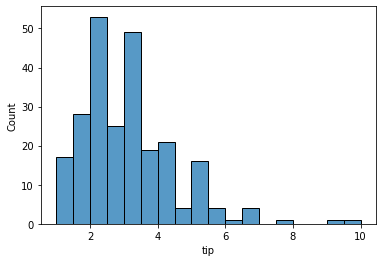

In [34]:
sns.histplot(data=tips, x='tip')

<AxesSubplot:xlabel='tip', ylabel='Count'>

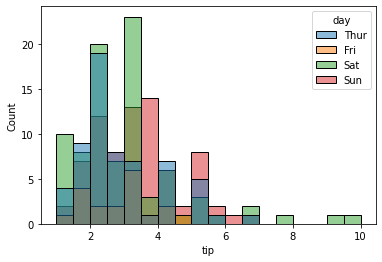

In [35]:
sns.histplot(data=tips, x='tip', hue='day')

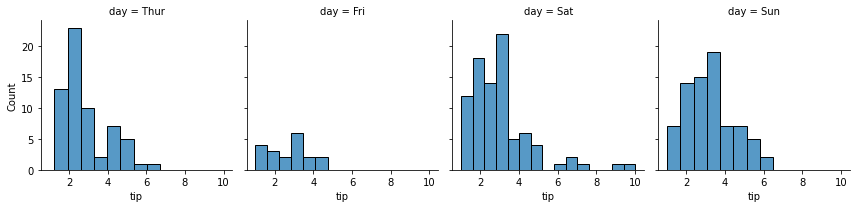

In [36]:
grid = sns.FacetGrid(data=tips, col='day')
grid.map_dataframe(sns.histplot, x='tip')

<AxesSubplot:xlabel='day', ylabel='tip'>

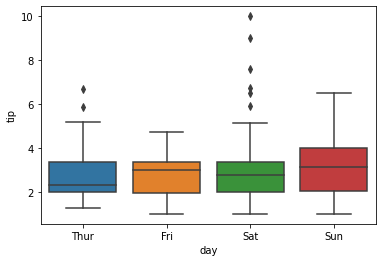

In [37]:
sns.boxplot(data=tips, x='day', y='tip')

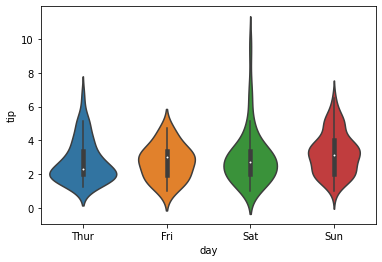

In [38]:
ax = sns.violinplot(data=tips, x='day', y='tip')

## Comparisons (plotting categorical data)

Text(0.5, 1.0, 'Bar chart of Restaurant visitors')

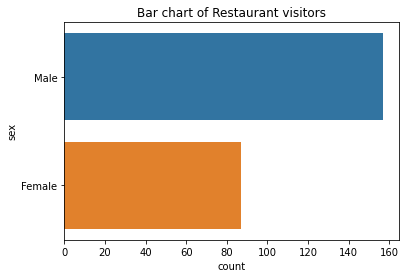

In [39]:
ax = sns.countplot(data=tips, y='sex')
ax.set_title('Bar chart of Restaurant visitors')

## Relationships

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

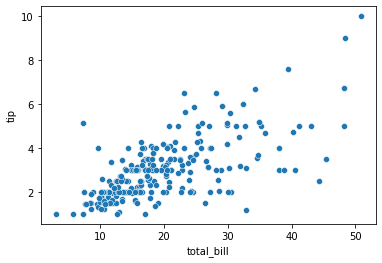

In [40]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

## Compositions

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

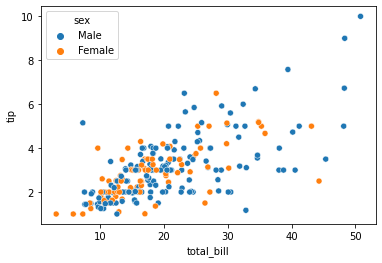

In [41]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')


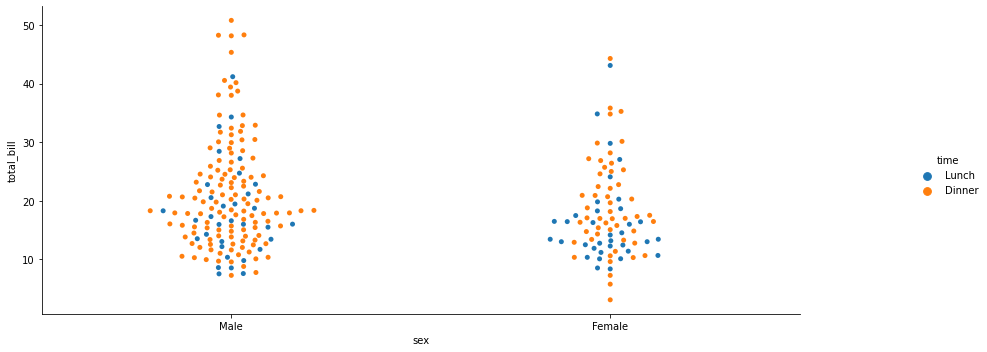

In [42]:
grid = sns.catplot(data=tips, x='sex', y='total_bill', hue='time', kind='swarm')
fig = grid.figure
fig.set_figwidth(15)

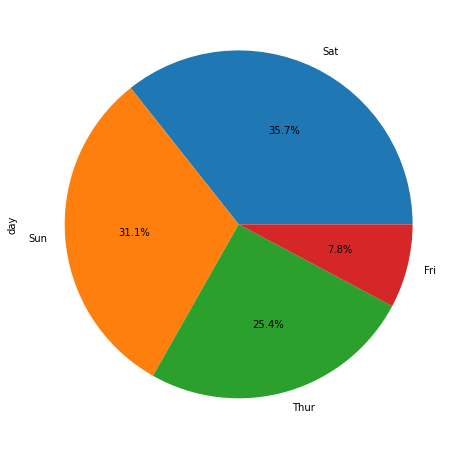

In [43]:
ax = tips['day'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8))